# COVID19 VISUALIZATION USING JOHN HOPKINS CSSE DATASET.
# This is notebook was created to show coronavirus's spread.
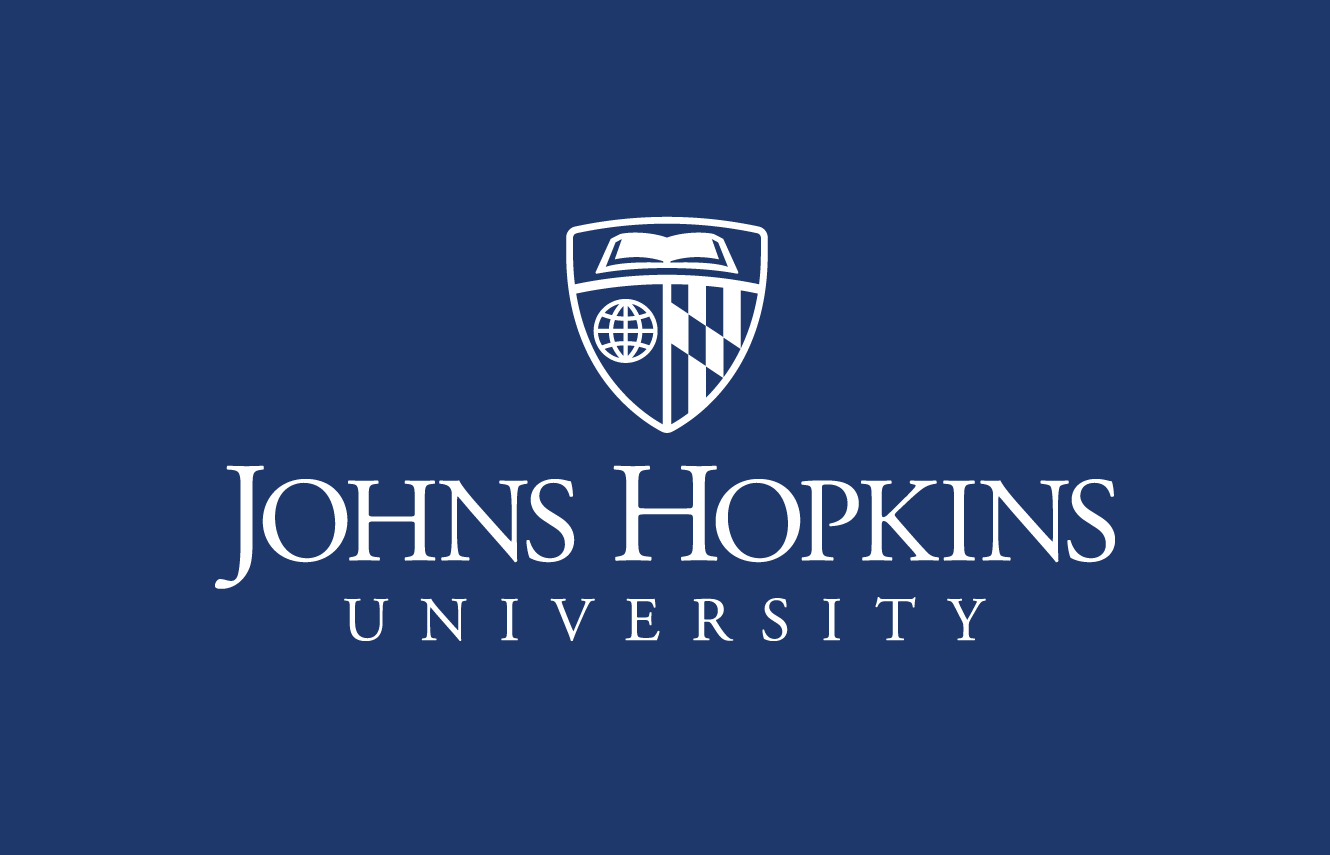


RESOURSES:
* Covid-19: active cases and extrapolation by Gaël Varoquaux, Emmanuelle Gouillart, Russell Poldrack, and Guillaume Lemaitre
* NYC Covid-19 data dashboard by Sue Marquez
* All of these dashboards contributed to by many and powered by the work of Hamel Husain.
* also this is useful.

Author: Bagdasarov ALbert

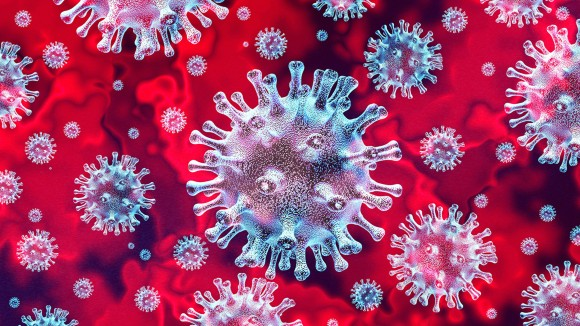

In [ ]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Set style & figures inline
sns.set()
%matplotlib inline

In [ ]:
confirmed_cases_data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
death_cases_data_url     = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
recovery_cases_data_url  = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

In [ ]:
# Import data & check it out
raw_data_confirmed = pd.read_csv(confirmed_cases_data_url)
raw_data_confirmed.head()

In [ ]:
# Group by region
data_day = raw_data_confirmed.groupby(['Country/Region']).sum().drop(['Lat', 'Long'], axis=1)
data_day.head()

In [ ]:
df = data_day.transpose()

In [ ]:
# Melt data so that it is long
data = data_day.reset_index().melt(id_vars='Country/Region', var_name='date')
data.head()

In [ ]:
data.loc[(data.value < 1),'value'] = None
data.head()

In [ ]:
# Pivot data to wide & index by date
df = data.pivot(index='date', columns='Country/Region', values='value')
df.tail()

In [ ]:
# Set index as DateTimeIndex
datetime_index = pd.DatetimeIndex(df.index)
df.set_index(datetime_index, inplace=True)
df.head()

****CLASSES AND FUNCTIONS FOR WORKING WITH DATA.****

In [ ]:
# Class for grouping data by region
class grouping_by_region:
    def __init__(self,raw_data,min_val):
        super().__init__()
        self.raw_data = raw_data
        self.min_val  = min_val
        self.axis     = 1
        self.index    = 'date'
        self.columns  = 'Country/Region'
    def Grouping(self):
        self.data_day = self.raw_data.groupby([self.columns]).sum().drop(['Lat', 'Long'], axis = self.axis)
        self.df       = self.data_day.transpose()
        self.data     = self.data_day.reset_index().melt(id_vars = self.columns, var_name = self.index)
        self.data.loc[(self.data.value < self.min_val), 'value'] = None 
        self.df       = self.data.pivot(index = self.index,columns = self.columns,values='value')
        # Set index as DateTimeIndex
        self.datetime_index = pd.DatetimeIndex(self.df.index)
        self.df.set_index(datetime_index, inplace=True)
        df = self.df
        return df

# Function to plot time series of several countries of interest
def plot_time_series(df, plot_title, x_label, y_label, isLogY=False):
    df.plot(figsize=(20,10), linewidth=5, fontsize=20, logy=isLogY)
    plt.xlabel(x_label, fontsize=20);
    plt.ylabel(y_label, fontsize=20);
    plt.title(plot_title, fontsize=20);
        
# Function to manipulate the data
def data_manipulation(df):
    df.dropna(axis=1, how='all', inplace=True)
    df = df.sort_index()
    df1 = df.reset_index().drop(['date'], axis=1)
    for col in df1.columns:
        df1[col] = df1[col].shift(-df1[col].first_valid_index())
        
    df2 = df1.apply(lambda x: x.shift(-x.first_valid_index()))
    return df2



NUMBER OF INFECTED VIS

In [ ]:
# Plot time series of several countries of interest
poi = ['China', 'US', 'Italy', 'France', 'Australia']
df[poi].plot(figsize=(20,10), linewidth=5, fontsize=20, logy=True)
plt.xlabel('Dates', fontsize=20)
plt.ylabel('Confirmed Patients Logarithmic count', fontsize=20)
plt.title('Confirmed Patients Logarithmic Time Series', fontsize=20)

Deaths VIS

In [ ]:
# Import data & check it out
raw_data_deaths = pd.read_csv(death_cases_data_url)
raw_data_deaths.head()

In [ ]:
# Usage of our class
k = grouping_by_region(raw_data_deaths,25)
k.Grouping()

In [ ]:
# Plot time series of several countries of interest
poi = ['China', 'US', 'Italy', 'France', 'Australia']
df[poi].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Date', fontsize=20);
plt.ylabel('Deaths Patients count', fontsize=20);
plt.title('Deaths Patients Time Series', fontsize=20);

**BUILDING A CLASS FOR CREATING THE COVID19 SREAD GRAPHS**

In [ ]:
class Graph_Builder:
    def __init__(self,country_list,time_index):
        super().__init__()
        self.countries_list = country_list
        self.time_index     = time_index
        self.time   = ['Dates','Days']
        self.data   = []
        print()
    def Nump_infected(self):
        if self.time[self.time_index] == 'Dates':
            df[self.countries_list].plot(figsize=(20,10), linewidth=5, fontsize=20, logy=True)
            plt.xlabel(self.time[self.time_index], fontsize=20)
            plt.ylabel('Confirmed Patients Logarithmic count', fontsize=20)
            plt.title('Confirmed Patients Logarithmic Time Series', fontsize=20)
        else:
            df1 = df.reset_index().drop(['date'], axis=1)
            df1.head()
            df2 = df1.apply(lambda x: x.shift(-x.first_valid_index()))
            df2[self.countries_list].plot(figsize=(20,10), linewidth=5, fontsize=20, logy=True)
            plt.xlabel(self.time[self.time_index], fontsize=20)
            plt.ylabel('Confirmed Patients Logarithmic count', fontsize=20)
            plt.title('Confirmed Patients Logarithmic Time Series', fontsize=20)

            
    def Deaths(self):
        if self.time[self.time_index] == 'Dates':
            df[self.countries_list].plot(figsize=(20,10), linewidth=5, fontsize=20)
            plt.xlabel(self.time[self.time_index], fontsize=20)
            plt.ylabel('Deaths Patients count', fontsize=20)
            plt.title('Deaths Patients Time Series', fontsize=20)
        if self.time[self.time_index] == 'Days':
            df1 = df.reset_index().drop(['date'], axis=1)
            df2 = df1.apply(lambda x: x.shift(-x.first_valid_index()))
            df2[self.countries_list].plot(figsize=(20,10), linewidth=5, fontsize=20, logy=True)
            plt.xlabel(self.time[self.time_index], fontsize=20)
            plt.xlabel(self.time[self.time_index], fontsize=20)
            plt.ylabel('Deaths Patients count', fontsize=20)
            plt.title('Deaths Patients Time Series', fontsize=20)
            
    def Recovered(self):
        if self.time[self.time_index] == 'Dates':
            plot_time_series(df[self.countries_list], 'Recovered Patients Time Series', 'Date', 'Recovered Patients count', False)
        

        

In [ ]:
# Example of usage class builder
countries_lists = ['US','Uzbekistan','France','Italy','Russia','Ukraine','France',]
time_index = 0
k = Graph_Builder(countries_lists,time_index)
k.Recovered()
k.Deaths()
k.Nump_infected()

time_index = 1
k = Graph_Builder(countries_lists,time_index)
k.Recovered()
k.Deaths()
k.Nump_infected()

So we have created python class for building graph,manipulating with datset.Potentially you could use it for other covi19 datasets.


If you find this notebook useful,please upvote. :)